## Introduction

In this project, we will analyze the spread of the new corona virus (nCov). We will use two datasets:
    - The John Hopkins University's dataset which contains aggregated daily data for confirmed cases, deaths and recovered patients. 
    https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series


##### Extra information: 

About getting dataset:

The reddit's datasets group is a good place to look for datasets. For example, you can check out useful sources for nCov data from here: https://www.reddit.com/r/datasets/comments/exnzrd/coronavirus_datasets/

Reddit in general is great for getting tips and browsing discussions. Some of my favorite subreddits are dataisbeautiful, datascience, MachineLearning.


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# old link: url_case = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_case = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# old link: url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
# old link: url_cured = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_cured = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

Let's take a look at the case time series first

In [3]:
case_new = pd.read_csv(url_case, index_col=[0, 1, 2, 3])

In [4]:
case_death = pd.read_csv(url_death, index_col=[0, 1, 2, 3])

In [5]:
case_cured = pd.read_csv(url_cured, index_col=[0, 1, 2, 3])

In [6]:
case_new

1/22/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/23/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/24/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/25/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         2

Since the John Hopkins dataset contains only aggregated data, we need to transform it into a format that allows us to answer more questions. You can see the ideal dataframe structure in the picture below.

You will need to:
- Stack the dataframe so that each row represents one date in a location. 
- Remove the rows where the cumulative number of cases is zero.
- Make a new column `location` to combine `prov_state` and `country`.
- Make a new column `new_case` to derive the new case number from cumulative case number.
- Convert the date column to datetime object.

After transforming data for number of cases, you can do the same for number of deaths and cureds (or write a function to transform 3 datasets). Then you can use `pd.merge()` to merge them into one dataframe. Hint: try merging `case` with `death` first and then merge that with `cured`. You should use a `left` merge on `['location', 'prov_state', 'country', 'lat', 'long', 'date']` columns

![title](desired_format.png)

### My solution, first cleaning data

In [7]:
case_death

1/22/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/23/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/24/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/25/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         2

In [8]:
case_cured

1/22/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/23/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/24/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/25/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         2

In [9]:
# Stack the dataframe so that each row represents one date in a location.
data_new = case_new.stack()
data_new

Province/State  Country/Region  Lat        Long              
NaN             Afghanistan     33.000000  65.000000  1/22/20    0
                                                      1/23/20    0
                                                      1/24/20    0
                                                      1/25/20    0
                                                      1/26/20    0
                                                                ..
                Yemen           15.552727  48.516388  4/11/20    1
                                                      4/12/20    1
                                                      4/13/20    1
                                                      4/14/20    1
                                                      4/15/20    1
Length: 22440, dtype: int64

In [10]:
# Stack the dataframe so that each row represents one date in a location.
data_death = case_death.stack()
data_death

Province/State  Country/Region  Lat        Long              
NaN             Afghanistan     33.000000  65.000000  1/22/20    0
                                                      1/23/20    0
                                                      1/24/20    0
                                                      1/25/20    0
                                                      1/26/20    0
                                                                ..
                Yemen           15.552727  48.516388  4/11/20    0
                                                      4/12/20    0
                                                      4/13/20    0
                                                      4/14/20    0
                                                      4/15/20    0
Length: 22440, dtype: int64

In [11]:
# Stack the dataframe so that each row represents one date in a location.
data_cured = case_cured.stack()
data_cured

Province/State  Country/Region  Lat        Long              
NaN             Afghanistan     33.000000  65.000000  1/22/20    0
                                                      1/23/20    0
                                                      1/24/20    0
                                                      1/25/20    0
                                                      1/26/20    0
                                                                ..
                Yemen           15.552727  48.516388  4/11/20    0
                                                      4/12/20    0
                                                      4/13/20    0
                                                      4/14/20    0
                                                      4/15/20    0
Length: 21250, dtype: int64

In [12]:
# reset = release index columns for use
data_new = data_new.reset_index()
data_new

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0
...,...,...,...,...,...,...
22435,NaN,Yemen,15.552727,48.516388,4/11/20,1
22436,NaN,Yemen,15.552727,48.516388,4/12/20,1
22437,NaN,Yemen,15.552727,48.516388,4/13/20,1
22438,NaN,Yemen,15.552727,48.516388,4/14/20,1


In [13]:
# reset = release index columns for use
data_death = data_death.reset_index()
data_death

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0
...,...,...,...,...,...,...
22435,NaN,Yemen,15.552727,48.516388,4/11/20,0
22436,NaN,Yemen,15.552727,48.516388,4/12/20,0
22437,NaN,Yemen,15.552727,48.516388,4/13/20,0
22438,NaN,Yemen,15.552727,48.516388,4/14/20,0


In [14]:
# reset = release index columns for use
data_cured = data_cured.reset_index()
data_cured

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0
...,...,...,...,...,...,...
21245,NaN,Yemen,15.552727,48.516388,4/11/20,0
21246,NaN,Yemen,15.552727,48.516388,4/12/20,0
21247,NaN,Yemen,15.552727,48.516388,4/13/20,0
21248,NaN,Yemen,15.552727,48.516388,4/14/20,0


In [15]:
# rename columns level 4 --> date and 0 --> cum_case
data_new = data_new.rename({'Province/State': 'prov_state', 'Country/Region': 'country', 'Lat': 'lat', 'Long': 'long', 'level_4': 'date', 0: 'cum_case'}, axis=1)
data_new

,prov_state,country,lat,long,date,cum_case
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0
...,...,...,...,...,...,...
22435,NaN,Yemen,15.552727,48.516388,4/11/20,1
22436,NaN,Yemen,15.552727,48.516388,4/12/20,1
22437,NaN,Yemen,15.552727,48.516388,4/13/20,1
22438,NaN,Yemen,15.552727,48.516388,4/14/20,1


In [16]:
# rename columns level 4 --> date and 0 --> cum_case
data_death = data_death.rename({'Province/State': 'prov_state', 'Country/Region': 'country', 'Lat': 'lat', 'Long': 'long', 'level_4': 'date', 0: 'cum_death'}, axis=1)
data_death

,prov_state,country,lat,long,date,cum_death
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0
...,...,...,...,...,...,...
22435,NaN,Yemen,15.552727,48.516388,4/11/20,0
22436,NaN,Yemen,15.552727,48.516388,4/12/20,0
22437,NaN,Yemen,15.552727,48.516388,4/13/20,0
22438,NaN,Yemen,15.552727,48.516388,4/14/20,0


In [17]:
# rename columns level 4 --> date and 0 --> cum_case
data_cured = data_cured.rename({'Province/State': 'prov_state', 'Country/Region': 'country', 'Lat': 'lat', 'Long': 'long', 'level_4': 'date', 0: 'cum_cured'}, axis=1)
data_cured

,prov_state,country,lat,long,date,cum_cured
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0
...,...,...,...,...,...,...
21245,NaN,Yemen,15.552727,48.516388,4/11/20,0
21246,NaN,Yemen,15.552727,48.516388,4/12/20,0
21247,NaN,Yemen,15.552727,48.516388,4/13/20,0
21248,NaN,Yemen,15.552727,48.516388,4/14/20,0


In [18]:
# Remove the rows where the cumulative number of cases is zero.
data_new = data_new.drop(data_new[data_new['cum_case'] == 0].index)
data_new

,prov_state,country,lat,long,date,cum_case
33,NaN,Afghanistan,33.000000,65.000000,2/24/20,1
34,NaN,Afghanistan,33.000000,65.000000,2/25/20,1
35,NaN,Afghanistan,33.000000,65.000000,2/26/20,1
36,NaN,Afghanistan,33.000000,65.000000,2/27/20,1
37,NaN,Afghanistan,33.000000,65.000000,2/28/20,1
...,...,...,...,...,...,...
22435,NaN,Yemen,15.552727,48.516388,4/11/20,1
22436,NaN,Yemen,15.552727,48.516388,4/12/20,1
22437,NaN,Yemen,15.552727,48.516388,4/13/20,1
22438,NaN,Yemen,15.552727,48.516388,4/14/20,1


In [19]:
# Remove the rows where the cumulative number of cases is zero.
data_death = data_death.drop(data_death[data_death['cum_death'] == 0].index)
data_death

,prov_state,country,lat,long,date,cum_death
60,NaN,Afghanistan,33.000000,65.000000,3/22/20,1
61,NaN,Afghanistan,33.000000,65.000000,3/23/20,1
62,NaN,Afghanistan,33.000000,65.000000,3/24/20,1
63,NaN,Afghanistan,33.000000,65.000000,3/25/20,2
64,NaN,Afghanistan,33.000000,65.000000,3/26/20,4
...,...,...,...,...,...,...
21925,NaN,Malawi,-13.254308,34.301525,4/11/20,2
21926,NaN,Malawi,-13.254308,34.301525,4/12/20,2
21927,NaN,Malawi,-13.254308,34.301525,4/13/20,2
21928,NaN,Malawi,-13.254308,34.301525,4/14/20,2


In [20]:
# Remove the rows where the cumulative number of cases is zero.
data_cured = data_cured.drop(data_cured[data_cured['cum_cured'] == 0].index)
data_cured

,prov_state,country,lat,long,date,cum_cured
54,NaN,Afghanistan,33.0000,65.0000,3/16/20,1
55,NaN,Afghanistan,33.0000,65.0000,3/17/20,1
56,NaN,Afghanistan,33.0000,65.0000,3/18/20,1
57,NaN,Afghanistan,33.0000,65.0000,3/19/20,1
58,NaN,Afghanistan,33.0000,65.0000,3/20/20,1
...,...,...,...,...,...,...
20820,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/11/20,1
20821,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/12/20,1
20822,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/13/20,1
20823,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/14/20,1


In [21]:
# Make a new column location to combine prov_state and country.
data_new.insert(0, 'location', np.where((data_new.prov_state.isnull()), data_new.country, data_new.prov_state))
data_new

,location,prov_state,country,lat,long,date,cum_case
33,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/24/20,1
34,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/25/20,1
35,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/26/20,1
36,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/27/20,1
37,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/28/20,1
...,...,...,...,...,...,...,...
22435,Yemen,NaN,Yemen,15.552727,48.516388,4/11/20,1
22436,Yemen,NaN,Yemen,15.552727,48.516388,4/12/20,1
22437,Yemen,NaN,Yemen,15.552727,48.516388,4/13/20,1
22438,Yemen,NaN,Yemen,15.552727,48.516388,4/14/20,1


In [22]:
# Make a new column location to combine prov_state and country.
data_death.insert(0, 'location', np.where((data_death.prov_state.isnull()), data_death.country, data_death.prov_state))
data_death

,location,prov_state,country,lat,long,date,cum_death
60,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/22/20,1
61,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/23/20,1
62,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/24/20,1
63,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/25/20,2
64,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/26/20,4
...,...,...,...,...,...,...,...
21925,Malawi,NaN,Malawi,-13.254308,34.301525,4/11/20,2
21926,Malawi,NaN,Malawi,-13.254308,34.301525,4/12/20,2
21927,Malawi,NaN,Malawi,-13.254308,34.301525,4/13/20,2
21928,Malawi,NaN,Malawi,-13.254308,34.301525,4/14/20,2


In [23]:
# Make a new column location to combine prov_state and country.
data_cured.insert(0, 'location', np.where((data_cured.prov_state.isnull()), data_cured.country, data_cured.prov_state))
data_cured

,location,prov_state,country,lat,long,date,cum_cured
54,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/16/20,1
55,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/17/20,1
56,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/18/20,1
57,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/19/20,1
58,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/20/20,1
...,...,...,...,...,...,...,...
20820,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/11/20,1
20821,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/12/20,1
20822,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/13/20,1
20823,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/14/20,1


In [24]:
# Make a new column new_case to derive the new case number from cumulative case number.
data_new['new_case'] = data_new.groupby('location')['cum_case'].diff(1)
data_new

,location,prov_state,country,lat,long,date,cum_case,new_case
33,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/24/20,1,NaN
34,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/25/20,1,0.0
35,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/26/20,1,0.0
36,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/27/20,1,0.0
37,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/28/20,1,0.0
...,...,...,...,...,...,...,...,...
22435,Yemen,NaN,Yemen,15.552727,48.516388,4/11/20,1,0.0
22436,Yemen,NaN,Yemen,15.552727,48.516388,4/12/20,1,0.0
22437,Yemen,NaN,Yemen,15.552727,48.516388,4/13/20,1,0.0
22438,Yemen,NaN,Yemen,15.552727,48.516388,4/14/20,1,0.0


In [25]:
# Make a new column new_case to derive the new case number from cumulative case number.
data_death['new_death'] = data_death.groupby('location')['cum_death'].diff(1)
data_death

,location,prov_state,country,lat,long,date,cum_death,new_death
60,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/22/20,1,NaN
61,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/23/20,1,0.0
62,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/24/20,1,0.0
63,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/25/20,2,1.0
64,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/26/20,4,2.0
...,...,...,...,...,...,...,...,...
21925,Malawi,NaN,Malawi,-13.254308,34.301525,4/11/20,2,1.0
21926,Malawi,NaN,Malawi,-13.254308,34.301525,4/12/20,2,0.0
21927,Malawi,NaN,Malawi,-13.254308,34.301525,4/13/20,2,0.0
21928,Malawi,NaN,Malawi,-13.254308,34.301525,4/14/20,2,0.0


In [26]:
# Make a new column new_case to derive the new case number from cumulative case number.
data_cured['new_cured'] = data_cured.groupby('location')['cum_cured'].diff(1)
data_cured

,location,prov_state,country,lat,long,date,cum_cured,new_cured
54,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/16/20,1,NaN
55,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/17/20,1,0.0
56,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/18/20,1,0.0
57,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/19/20,1,0.0
58,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/20/20,1,0.0
...,...,...,...,...,...,...,...,...
20820,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/11/20,1,0.0
20821,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/12/20,1,0.0
20822,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/13/20,1,0.0
20823,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/14/20,1,0.0


In [27]:
# Convert the date column to datetime object.
data_new.date = data_new.date.astype('datetime64')
data_new

,location,prov_state,country,lat,long,date,cum_case,new_case
33,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-24,1,NaN
34,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-25,1,0.0
35,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-26,1,0.0
36,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-27,1,0.0
37,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-28,1,0.0
...,...,...,...,...,...,...,...,...
22435,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-11,1,0.0
22436,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-12,1,0.0
22437,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-13,1,0.0
22438,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-14,1,0.0


In [28]:
# Convert the date column to datetime object.
data_death.date = data_death.date.astype('datetime64')
data_death

,location,prov_state,country,lat,long,date,cum_death,new_death
60,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-03-22,1,NaN
61,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-03-23,1,0.0
62,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-03-24,1,0.0
63,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-03-25,2,1.0
64,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-03-26,4,2.0
...,...,...,...,...,...,...,...,...
21925,Malawi,NaN,Malawi,-13.254308,34.301525,2020-04-11,2,1.0
21926,Malawi,NaN,Malawi,-13.254308,34.301525,2020-04-12,2,0.0
21927,Malawi,NaN,Malawi,-13.254308,34.301525,2020-04-13,2,0.0
21928,Malawi,NaN,Malawi,-13.254308,34.301525,2020-04-14,2,0.0


In [29]:
# Convert the date column to datetime object.
data_cured.date = data_cured.date.astype('datetime64')
data_cured

,location,prov_state,country,lat,long,date,cum_cured,new_cured
54,Afghanistan,NaN,Afghanistan,33.0000,65.0000,2020-03-16,1,NaN
55,Afghanistan,NaN,Afghanistan,33.0000,65.0000,2020-03-17,1,0.0
56,Afghanistan,NaN,Afghanistan,33.0000,65.0000,2020-03-18,1,0.0
57,Afghanistan,NaN,Afghanistan,33.0000,65.0000,2020-03-19,1,0.0
58,Afghanistan,NaN,Afghanistan,33.0000,65.0000,2020-03-20,1,0.0
...,...,...,...,...,...,...,...,...
20820,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-04-11,1,0.0
20821,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-04-12,1,0.0
20822,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-04-13,1,0.0
20823,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-04-14,1,0.0


### merge datasets

After transforming data for number of cases, you can do the same for number of deaths and cureds (or write a function to transform 3 datasets). Then you can use pd.merge() to merge them into one dataframe. Hint: try merging case with death first and then merge that with cured. You should use a left merge on ['location', 'prov_state', 'country', 'lat', 'long', 'date'] columns

In [30]:
# lets merge case_new and case_death
data_final = pd.merge(data_new, data_death, how='left', on=['location', 'prov_state', 'country', 'lat', 'long', 'date'])
data_final

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death
0,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-24,1,NaN,NaN,NaN
1,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-25,1,0.0,NaN,NaN
2,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-26,1,0.0,NaN,NaN
3,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-27,1,0.0,NaN,NaN
4,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-28,1,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12305,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-11,1,0.0,NaN,NaN
12306,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-12,1,0.0,NaN,NaN
12307,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-13,1,0.0,NaN,NaN
12308,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-14,1,0.0,NaN,NaN


In [31]:
# lets merge case_cured to data_final
data_final = pd.merge(data_final, data_cured, how='left', on=['location', 'prov_state', 'country', 'lat', 'long', 'date'])
data_final

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
0,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-24,1,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-25,1,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-26,1,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-27,1,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-28,1,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12305,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-11,1,0.0,NaN,NaN,NaN,NaN
12306,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-12,1,0.0,NaN,NaN,NaN,NaN
12307,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-13,1,0.0,NaN,NaN,NaN,NaN
12308,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-14,1,0.0,NaN,NaN,NaN,NaN


### find incorrect data and correct those

In [32]:
# charts showed that there are something odd values still in dataset. Those have to be found.
data_final.columns

Index(['location', 'prov_state', 'country', 'lat', 'long', 'date', 'cum_case',
       'new_case', 'cum_death', 'new_death', 'cum_cured', 'new_cured'],
      dtype='object')

In [33]:
# new case column can not have negative values
new_neg_index = data_final[(data_final['new_case']) < 0]
new_neg_index

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
368,Australian Capital Territory,Australian Capital Territory,Australia,-35.4735,149.0124,2020-04-13,102,-1.0,2.0,0.0,59.0,0.0
493,Queensland,Queensland,Australia,-28.0167,153.4000,2020-01-31,2,-1.0,NaN,NaN,NaN,NaN
495,Queensland,Queensland,Australia,-28.0167,153.4000,2020-02-02,2,-1.0,NaN,NaN,NaN,NaN
1667,Alberta,Alberta,Canada,53.9333,-116.5765,2020-03-25,358,-1.0,2.0,1.0,NaN,NaN
1832,Manitoba,Manitoba,Canada,53.7609,-98.8139,2020-04-12,242,-1.0,4.0,0.0,NaN,NaN
2006,Ontario,Ontario,Canada,51.2538,-85.3232,2020-04-06,4347,-7.0,150.0,31.0,NaN,NaN
2884,Guizhou,Guizhou,China,26.8154,106.8748,2020-03-18,146,-1.0,2.0,0.0,144.0,0.0
6215,New Caledonia,New Caledonia,France,-20.9043,165.6180,2020-04-04,17,-1.0,NaN,NaN,1.0,0.0
6268,Saint Barthelemy,Saint Barthelemy,France,17.9000,-62.8333,2020-03-09,1,-2.0,NaN,NaN,NaN,NaN
6465,France,NaN,France,46.2276,2.2137,2020-04-14,130253,-6526.0,15729.0,762.0,28805.0,1087.0


In [34]:
# new death column can not have negative values
death_neg_index = data_final[(data_final['new_death']) < 0]
death_neg_index

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
2071,Quebec,Quebec,Canada,52.9399,-73.5491,2020-03-22,219,38.0,4.0,-1.0,NaN,NaN
5388,Cyprus,NaN,Cyprus,35.1264,33.4299,2020-04-05,446,20.0,9.0,-2.0,37.0,4.0
6049,Finland,NaN,Finland,64.0000,26.0000,2020-04-06,2176,249.0,27.0,-1.0,300.0,0.0
6655,Germany,NaN,Germany,51.0000,9.0000,2020-04-11,124908,2737.0,2736.0,-31.0,57400.0,3487.0
7010,Iceland,NaN,Iceland,64.9631,-19.0208,2020-03-17,220,40.0,1.0,-4.0,NaN,NaN
7091,India,NaN,India,21.0000,78.0000,2020-03-21,330,86.0,4.0,-1.0,23.0,3.0
7627,Kazakhstan,NaN,Kazakhstan,48.0196,66.9237,2020-03-26,111,30.0,1.0,-2.0,2.0,NaN
7636,Kazakhstan,NaN,Kazakhstan,48.0196,66.9237,2020-04-04,531,67.0,5.0,-1.0,36.0,7.0
8115,Luxembourg,NaN,Luxembourg,49.8153,6.1296,2020-04-14,3307,15.0,67.0,-2.0,500.0,0.0
9417,Philippines,NaN,Philippines,13.0000,122.0000,2020-03-19,217,15.0,17.0,-2.0,8.0,3.0


In [35]:
# new cured column can not have negative values
cured_neg_index = data_final[(data_final['new_cured'] < 0)]
cured_neg_index

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
118,Algeria,NaN,Algeria,28.0339,1.6596,2020-03-24,264,34.0,19.0,2.0,24.0,-41.0
120,Algeria,NaN,Algeria,28.0339,1.6596,2020-03-26,367,65.0,25.0,4.0,29.0,-36.0
838,Austria,NaN,Austria,47.5162,14.5501,2020-03-17,1332,314.0,3.0,0.0,1.0,-5.0
889,Azerbaijan,NaN,Azerbaijan,40.1431,47.5769,2020-03-22,65,12.0,1.0,0.0,10.0,-1.0
1103,Belarus,NaN,Belarus,53.7098,27.9534,2020-04-05,562,122.0,8.0,3.0,52.0,-1.0
1159,Belgium,NaN,Belgium,50.8333,4.0000,2020-03-20,2257,462.0,37.0,16.0,1.0,-30.0
1600,Cambodia,NaN,Cambodia,11.5500,104.9167,2020-04-09,119,2.0,NaN,NaN,62.0,-1.0
2764,Guangxi,Guangxi,China,23.8298,108.7881,2020-02-12,222,7.0,1.0,0.0,32.0,-1.0
2843,Guizhou,Guizhou,China,26.8154,106.8748,2020-02-06,71,7.0,1.0,0.0,6.0,-3.0
2937,Hainan,Hainan,China,19.1959,109.7453,2020-02-15,162,3.0,4.0,0.0,39.0,-4.0


In [50]:
# change negative values to zero in clomuns: new_case, new_death, new_cured
if len(new_neg_index.index) != 0:
    index_tbl = new_neg_index.index
    for x in index_tbl:
        if (data_final.new_case[x] < 0):
            data_final.new_case[x] = 0

if len(death_neg_index.index) != 0:
    index_tbl = death_neg_index.index
    for x in index_tbl:
        if (data_final.new_death[x] < 0):
            data_final.new_death[x] = 0

if len(cured_neg_index.index) != 0:
    index_tbl = cured_neg_index.index
    for x in index_tbl:
        if (data_final.new_cured[x] < 0):
            data_final.new_cured[x] = 0


In [37]:
# comfirm that negative values are corrected
data_final[(data_final['new_case']) < 0]

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured


In [38]:
# comfirm that negative values are corrected
data_final[(data_final['new_death']) < 0]

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured


In [39]:
# comfirm that negative values are corrected
data_final[(data_final['new_cured']) < 0]

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured


In [40]:
# in one of charts show some odd values, too high value, search for that, column new_case
data_final[(data_final['new_cured'] > 400)]

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
852,Austria,NaN,Austria,47.5162,14.5501,2020-03-31,10180,562.0,128.0,20.0,1095.0,459.0
856,Austria,NaN,Austria,47.5162,14.5501,2020-04-04,11781,257.0,186.0,18.0,2507.0,485.0
857,Austria,NaN,Austria,47.5162,14.5501,2020-04-05,12051,270.0,204.0,18.0,2998.0,491.0
858,Austria,NaN,Austria,47.5162,14.5501,2020-04-06,12297,246.0,220.0,16.0,3463.0,465.0
859,Austria,NaN,Austria,47.5162,14.5501,2020-04-07,12639,342.0,243.0,23.0,4046.0,583.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11496,US,NaN,US,37.0902,-95.7129,2020-04-11,526396,29861.0,20463.0,1877.0,31270.0,2480.0
11497,US,NaN,US,37.0902,-95.7129,2020-04-12,555313,28917.0,22020.0,1557.0,32988.0,1718.0
11498,US,NaN,US,37.0902,-95.7129,2020-04-13,580619,25306.0,23529.0,1509.0,43482.0,10494.0
11499,US,NaN,US,37.0902,-95.7129,2020-04-14,607670,27051.0,25832.0,2303.0,47763.0,4281.0


In [41]:
# this row was showed odd in chart, investigate more about it, below, check column new_case
data_final[(data_final['date'] == '2020-02-13') & (data_final['location'] == 'Hubei')]

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
3358,Hubei,Hubei,China,30.9756,112.2707,2020-02-13,48206,14840.0,1310.0,242.0,3459.0,773.0


In [42]:
# check values around found very high value and what might cause it, column new_case
data_final.iloc[2240:2251]

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
2240,Anhui,Anhui,China,31.8257,117.2264,2020-01-28,106,36.0,NaN,NaN,NaN,NaN
2241,Anhui,Anhui,China,31.8257,117.2264,2020-01-29,152,46.0,NaN,NaN,2.0,NaN
2242,Anhui,Anhui,China,31.8257,117.2264,2020-01-30,200,48.0,NaN,NaN,2.0,0.0
2243,Anhui,Anhui,China,31.8257,117.2264,2020-01-31,237,37.0,NaN,NaN,3.0,1.0
2244,Anhui,Anhui,China,31.8257,117.2264,2020-02-01,297,60.0,NaN,NaN,5.0,2.0
2245,Anhui,Anhui,China,31.8257,117.2264,2020-02-02,340,43.0,NaN,NaN,7.0,2.0
2246,Anhui,Anhui,China,31.8257,117.2264,2020-02-03,408,68.0,NaN,NaN,14.0,7.0
2247,Anhui,Anhui,China,31.8257,117.2264,2020-02-04,480,72.0,NaN,NaN,20.0,6.0
2248,Anhui,Anhui,China,31.8257,117.2264,2020-02-05,530,50.0,NaN,NaN,23.0,3.0
2249,Anhui,Anhui,China,31.8257,117.2264,2020-02-06,591,61.0,NaN,NaN,34.0,11.0


Found very high value is reported as thus and wherefore it is valid value.

# China modifications

In [43]:
# 
# China's numbers
# data_new
China_dataM = data_final[(data_final['country'] == 'China')]
# China_dataM

# drop old location column
China_dataM = China_dataM.drop('location', axis=1)

# Make a new column location from country.
China_dataM.insert(0, 'location', China_dataM.country)
# China_dataM

# group by province
China_dataM_gb = China_dataM.groupby('prov_state')
China_dataM_gb.head()

# copy data to other dataset for chart
# China_dataM_gb_Chart = China_dataM_gb.copy()

# China_dataM_gb.groups

# China_dataM_gb.agg({'MSRP': ['max','min'], 'MPG_City': 'mean'})

# # calculate max values togerher
# China_dataM_gb = China_dataM_gb[['cum_case']].max()
# China_dataM_gb.head(40)

# China_dataM_gb_sum = China_dataM_gb.sum(axis=0)
# China_dataM_gb_sum


,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
2234,China,Anhui,China,31.8257,117.2264,2020-01-22,1,NaN,NaN,NaN,NaN,NaN
2235,China,Anhui,China,31.8257,117.2264,2020-01-23,9,8.0,NaN,NaN,NaN,NaN
2236,China,Anhui,China,31.8257,117.2264,2020-01-24,15,6.0,NaN,NaN,NaN,NaN
2237,China,Anhui,China,31.8257,117.2264,2020-01-25,39,24.0,NaN,NaN,NaN,NaN
2238,China,Anhui,China,31.8257,117.2264,2020-01-26,60,21.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4935,China,Zhejiang,China,29.1832,120.0934,2020-01-22,10,NaN,NaN,NaN,NaN,NaN
4936,China,Zhejiang,China,29.1832,120.0934,2020-01-23,27,17.0,NaN,NaN,NaN,NaN
4937,China,Zhejiang,China,29.1832,120.0934,2020-01-24,43,16.0,NaN,NaN,1.0,NaN
4938,China,Zhejiang,China,29.1832,120.0934,2020-01-25,62,19.0,NaN,NaN,1.0,0.0


In [44]:
# China_dataM_gb.groups
China_dataM_gb.agg({'cum_case': ['max','min']})
# 

cum_case     
                    max  min
prov_state                  
Anhui               991    1
Beijing             590   14
Chongqing           579    6
Fujian              353    1
Gansu               139    2
Guangdong          1566   26
Guangxi             254    2
Guizhou             147    1
Hainan              168    4
Hebei               327    1
Heilongjiang        841    2
Henan              1276    5
Hong Kong          1017    2
Hubei             67803  444
Hunan              1019    4
Inner Mongolia      190    1
Jiangsu             653    1
Jiangxi             937    2
Jilin               102    1
Liaoning            145    2
Macau                45    1
Ningxia              75    1
Qinghai              18    1
Shaanxi             256    3
Shandong            784    2
Shanghai            622    9
Shanxi              186    1
Sichuan             560    5
Tianjin             185    4
Tibet                 1    1
Xinjiang             76    2
Yunnan              184    1
Zhejiang           1268   10

In [45]:
# calculate max values togerher
China_dataM_gb = China_dataM_gb[['cum_case']].max()
China_dataM_gb.head(40)

,cum_case
prov_state,
Anhui,991
Beijing,590
Chongqing,579
Fujian,353
Gansu,139
Guangdong,1566
Guangxi,254
Guizhou,147
Hainan,168


In [46]:
# calculate all values togerher
China_dataM_gb_sum = China_dataM_gb.sum(axis=0)
China_dataM_gb_sum

cum_case    83357
dtype: int64

#### old chart below

In [47]:
# 
# China's numbers
#
China_data = data_final[(data_final['country'] == 'China')]
China_data

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
2234,Anhui,Anhui,China,31.8257,117.2264,2020-01-22,1,NaN,NaN,NaN,NaN,NaN
2235,Anhui,Anhui,China,31.8257,117.2264,2020-01-23,9,8.0,NaN,NaN,NaN,NaN
2236,Anhui,Anhui,China,31.8257,117.2264,2020-01-24,15,6.0,NaN,NaN,NaN,NaN
2237,Anhui,Anhui,China,31.8257,117.2264,2020-01-25,39,24.0,NaN,NaN,NaN,NaN
2238,Anhui,Anhui,China,31.8257,117.2264,2020-01-26,60,21.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5015,Zhejiang,Zhejiang,China,29.1832,120.0934,2020-04-11,1267,0.0,1.0,0.0,1236.0,1.0
5016,Zhejiang,Zhejiang,China,29.1832,120.0934,2020-04-12,1267,0.0,1.0,0.0,1238.0,2.0
5017,Zhejiang,Zhejiang,China,29.1832,120.0934,2020-04-13,1267,0.0,1.0,0.0,1239.0,1.0
5018,Zhejiang,Zhejiang,China,29.1832,120.0934,2020-04-14,1267,0.0,1.0,0.0,1242.0,3.0


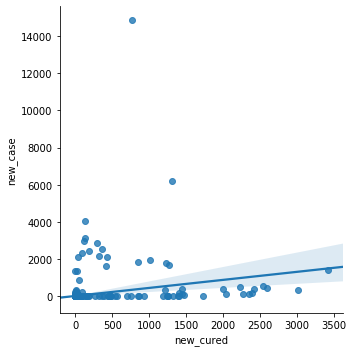

In [48]:
sns.lmplot(y='new_case', x='new_cured', data=China_data)

### some chart from datasets

In [49]:
# # do Step Demo chart from China's numbers
# plt.figure(figsize=(15, 8))
# plt.step(China_dataM_gb_Chart.date, China_dataM_gb_Chart.cum_case, label='cum_case')
# plt.plot(China_dataM_gb_Chart.date, China_dataM_gb_Chart.cum_case, 'C1o', alpha=0.5)
# plt.step(China_dataM_gb_Chart.date, China_dataM_gb_Chart.cum_death, label='new_cured')
# plt.plot(China_dataM_gb_Chart.date, China_dataM_gb_Chart.cum_death, 'C2o', alpha=0.5)
# plt.step(China_dataM_gb_Chart.date, China_dataM_gb_Chart.cum_cured, label='cum_cured')
# plt.plot(China_dataM_gb_Chart.date, China_dataM_gb_Chart.cum_cured, 'C3o', alpha=0.5)
# plt.legend(title='China\'s figures', title_fontsize=14, bbox_to_anchor=(0.19, 0.95), borderaxespad=0.8, fontsize=14, shadow=True, columnspacing=3.0, fancybox =True)
# plt.show()